In [1]:
import numpy as np # linear algebra
import pandas as pd

In [2]:
import os
for dirname, _, filenames in os.walk("C:/Users/Harshini/Desktop/Courses/diabetes_data.csv"):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [4]:
import sys
sys.path

['C:\\Users\\Harshini\\projects',
 'C:\\Users\\Harshini\\anaconda3\\envs\\Harsh\\python38.zip',
 'C:\\Users\\Harshini\\anaconda3\\envs\\Harsh\\DLLs',
 'C:\\Users\\Harshini\\anaconda3\\envs\\Harsh\\lib',
 'C:\\Users\\Harshini\\anaconda3\\envs\\Harsh',
 '',
 'C:\\Users\\Harshini\\anaconda3\\envs\\Harsh\\lib\\site-packages',
 'C:\\Users\\Harshini\\anaconda3\\envs\\Harsh\\lib\\site-packages\\win32',
 'C:\\Users\\Harshini\\anaconda3\\envs\\Harsh\\lib\\site-packages\\win32\\lib',
 'C:\\Users\\Harshini\\anaconda3\\envs\\Harsh\\lib\\site-packages\\Pythonwin',
 'C:\\Users\\Harshini\\anaconda3\\envs\\Harsh\\lib\\site-packages\\IPython\\extensions',
 'C:\\Users\\Harshini\\.ipython']

In [9]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import pickle
import sklearn
import scipy
import seaborn as sns
sns.set()

In [12]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [5]:
sys.executable

'C:\\Users\\Harshini\\anaconda3\\envs\\Harsh\\python.exe'

In [13]:
import plotly.express as px

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix

In [14]:
df = pd.read_csv("C:/Users/Harshini/Desktop/Courses/diabetes_data.csv",index_col = 0)
df.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,,,,,,,,
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1


In [15]:
numerical_feature = [feature for feature in df.columns if df[feature].dtypes != 'O']
print("Numerical Features Count {}".format(len(numerical_feature)))

Numerical Features Count 8


In [16]:
discrete_feature=[feature for feature in numerical_feature if len(df[feature].unique())<25]
print("Discrete feature Count {}".format(len(discrete_feature)))

Discrete feature Count 1


In [17]:
continuous_feature = [feature for feature in numerical_feature if feature not in discrete_feature]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 7


In [18]:
categorical_feature = [feature for feature in df.columns if feature not in numerical_feature]
print("Categorical feature Count {}".format(len(categorical_feature)))

Categorical feature Count 0


In [19]:
df.isnull().sum() #checking for missing values

Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [20]:
# Handle Missing Values
df.isnull().sum()*100/len(df)

Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64

In [21]:
#shape of dataset
df.shape

(768, 8)

In [22]:
df.describe()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 6 to 1
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Glucose                   768 non-null    int64  
 1   BloodPressure             768 non-null    int64  
 2   SkinThickness             768 non-null    int64  
 3   Insulin                   768 non-null    int64  
 4   BMI                       768 non-null    float64
 5   DiabetesPedigreeFunction  768 non-null    float64
 6   Age                       768 non-null    int64  
 7   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 54.0 KB


In [24]:
#print random five row
df.sample(5)

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,,,,,,,,
4,95,60,32,0,35.4,0.284,28,0
3,170,64,37,225,34.5,0.356,30,1
5,137,108,0,0,48.8,0.227,37,1
0,118,84,47,230,45.8,0.551,31,1
2,123,48,32,165,42.1,0.520,26,0


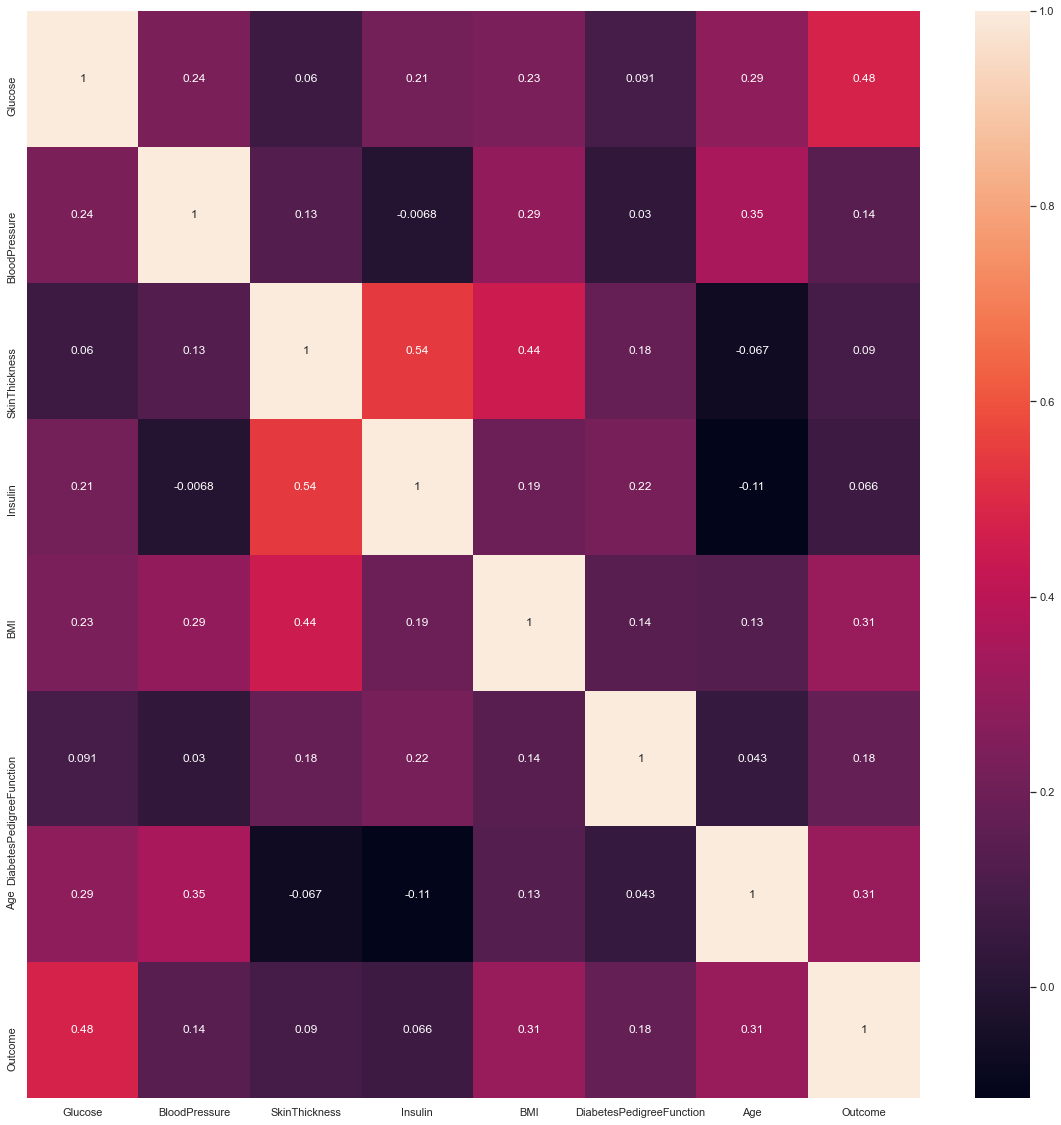

In [25]:
Harshi = df.corr(method = "spearman")
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(Harshi,annot=True)

C:\Users\Harshini\anaconda3\envs\Harsh\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


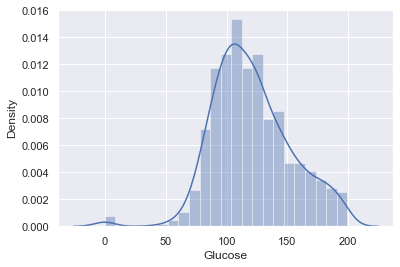

C:\Users\Harshini\anaconda3\envs\Harsh\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


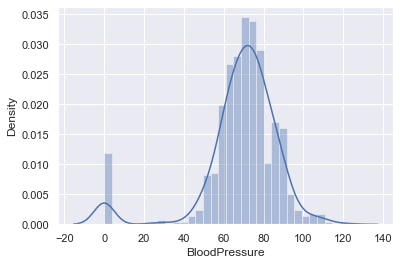

C:\Users\Harshini\anaconda3\envs\Harsh\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


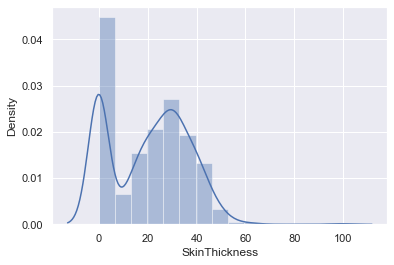

C:\Users\Harshini\anaconda3\envs\Harsh\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


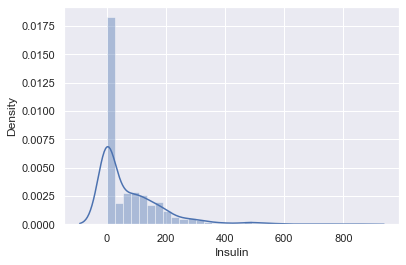

C:\Users\Harshini\anaconda3\envs\Harsh\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


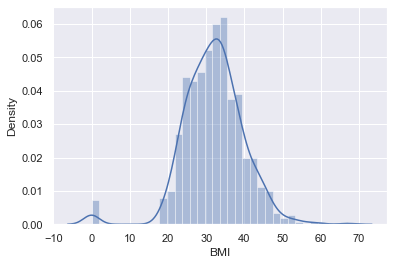

C:\Users\Harshini\anaconda3\envs\Harsh\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


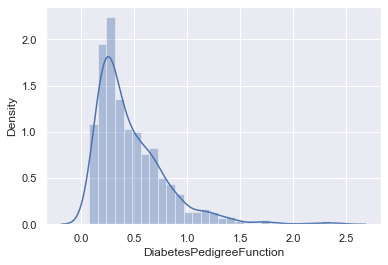

C:\Users\Harshini\anaconda3\envs\Harsh\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


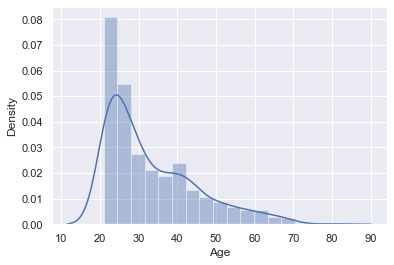

C:\Users\Harshini\anaconda3\envs\Harsh\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


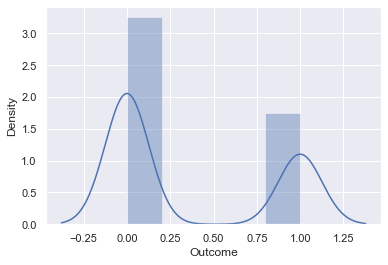

In [26]:
df_feature = df.columns

for feature in df_feature:
    p = sns.distplot(a = df[feature])
    plt.show()

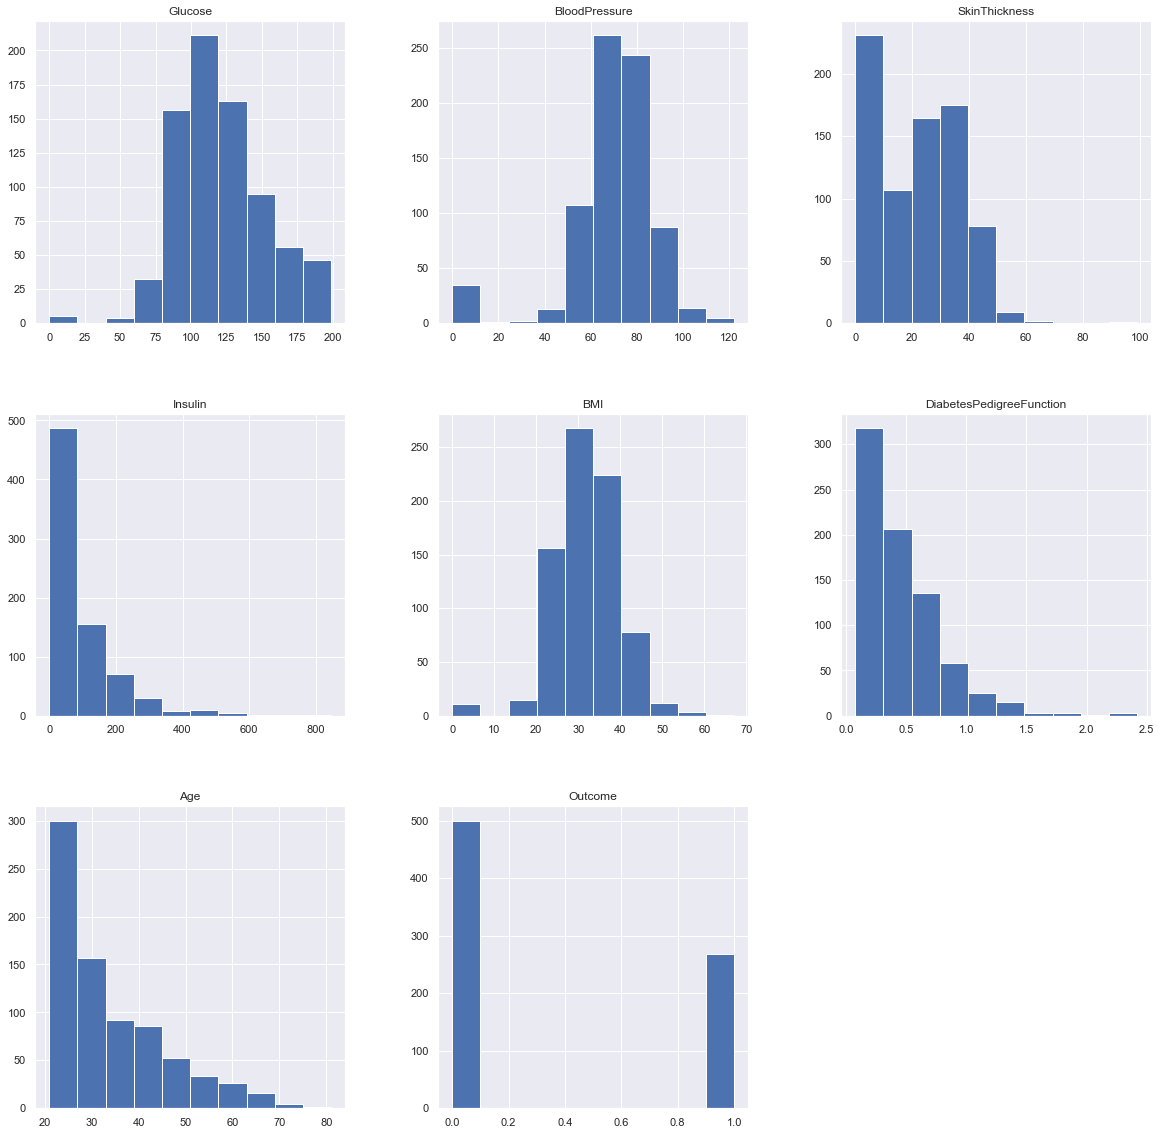

In [27]:
p = df.hist(figsize = (20,20))

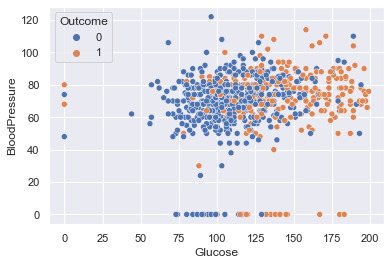

In [28]:
kp =sns.scatterplot(x= "Glucose" ,y= "BloodPressure",
              hue="Outcome",
              data=df);

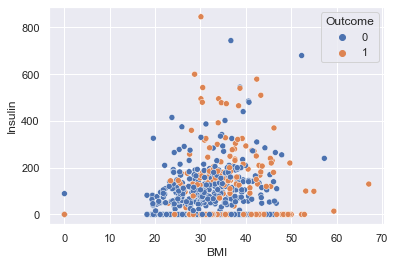

In [29]:
kp1 =sns.scatterplot(x= "BMI" ,y= "Insulin",
              hue="Outcome",
              data=df);

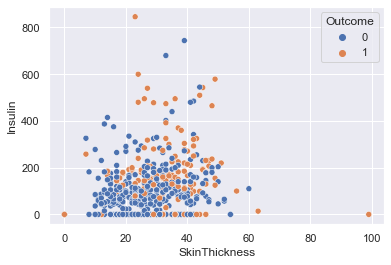

In [30]:
kp2 =sns.scatterplot(x= "SkinThickness" ,y= "Insulin",
              hue="Outcome",
              data=df);

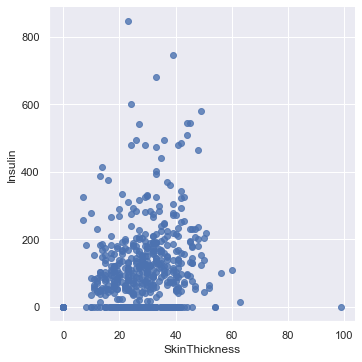

In [31]:
sns.lmplot(x='SkinThickness',y='Insulin',data=df,fit_reg=False)

<AxesSubplot:>

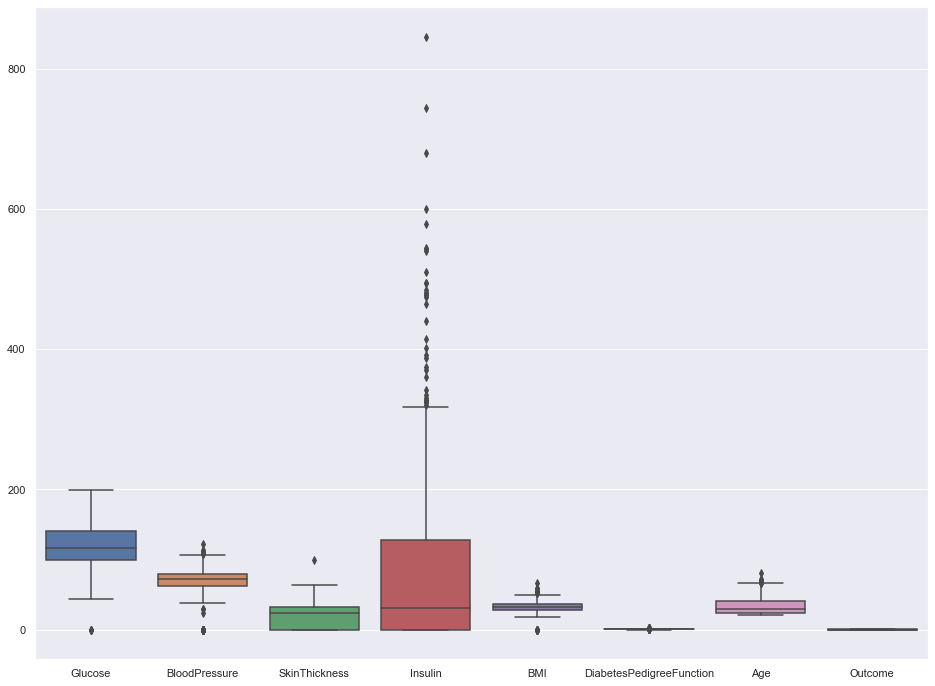

In [32]:
plt.figure(figsize=(16,12))
sns.boxplot(data=df)

<AxesSubplot:ylabel='SkinThickness'>

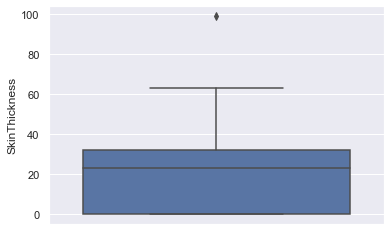

In [33]:
sns.boxplot(y = 'SkinThickness', data = df)

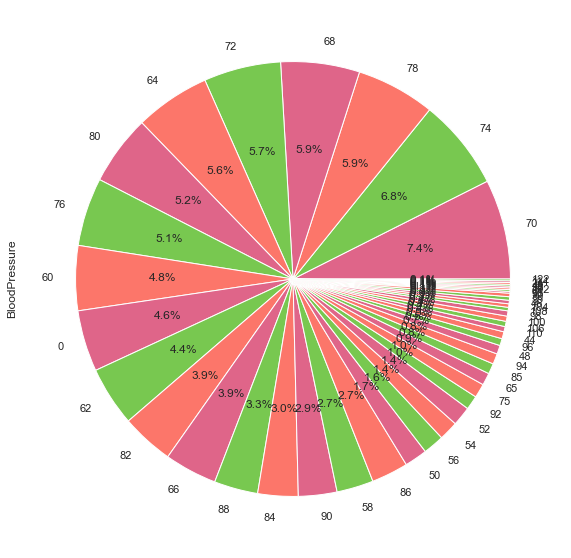

In [34]:
colors =  ["#DF6589FF", "#78C850","#FC766AFF"]
ax= df['BloodPressure'].value_counts(ascending=False).plot.pie(colors=colors,
            autopct='%1.1f%%',
            figsize=(15, 10)) 
plt.show()

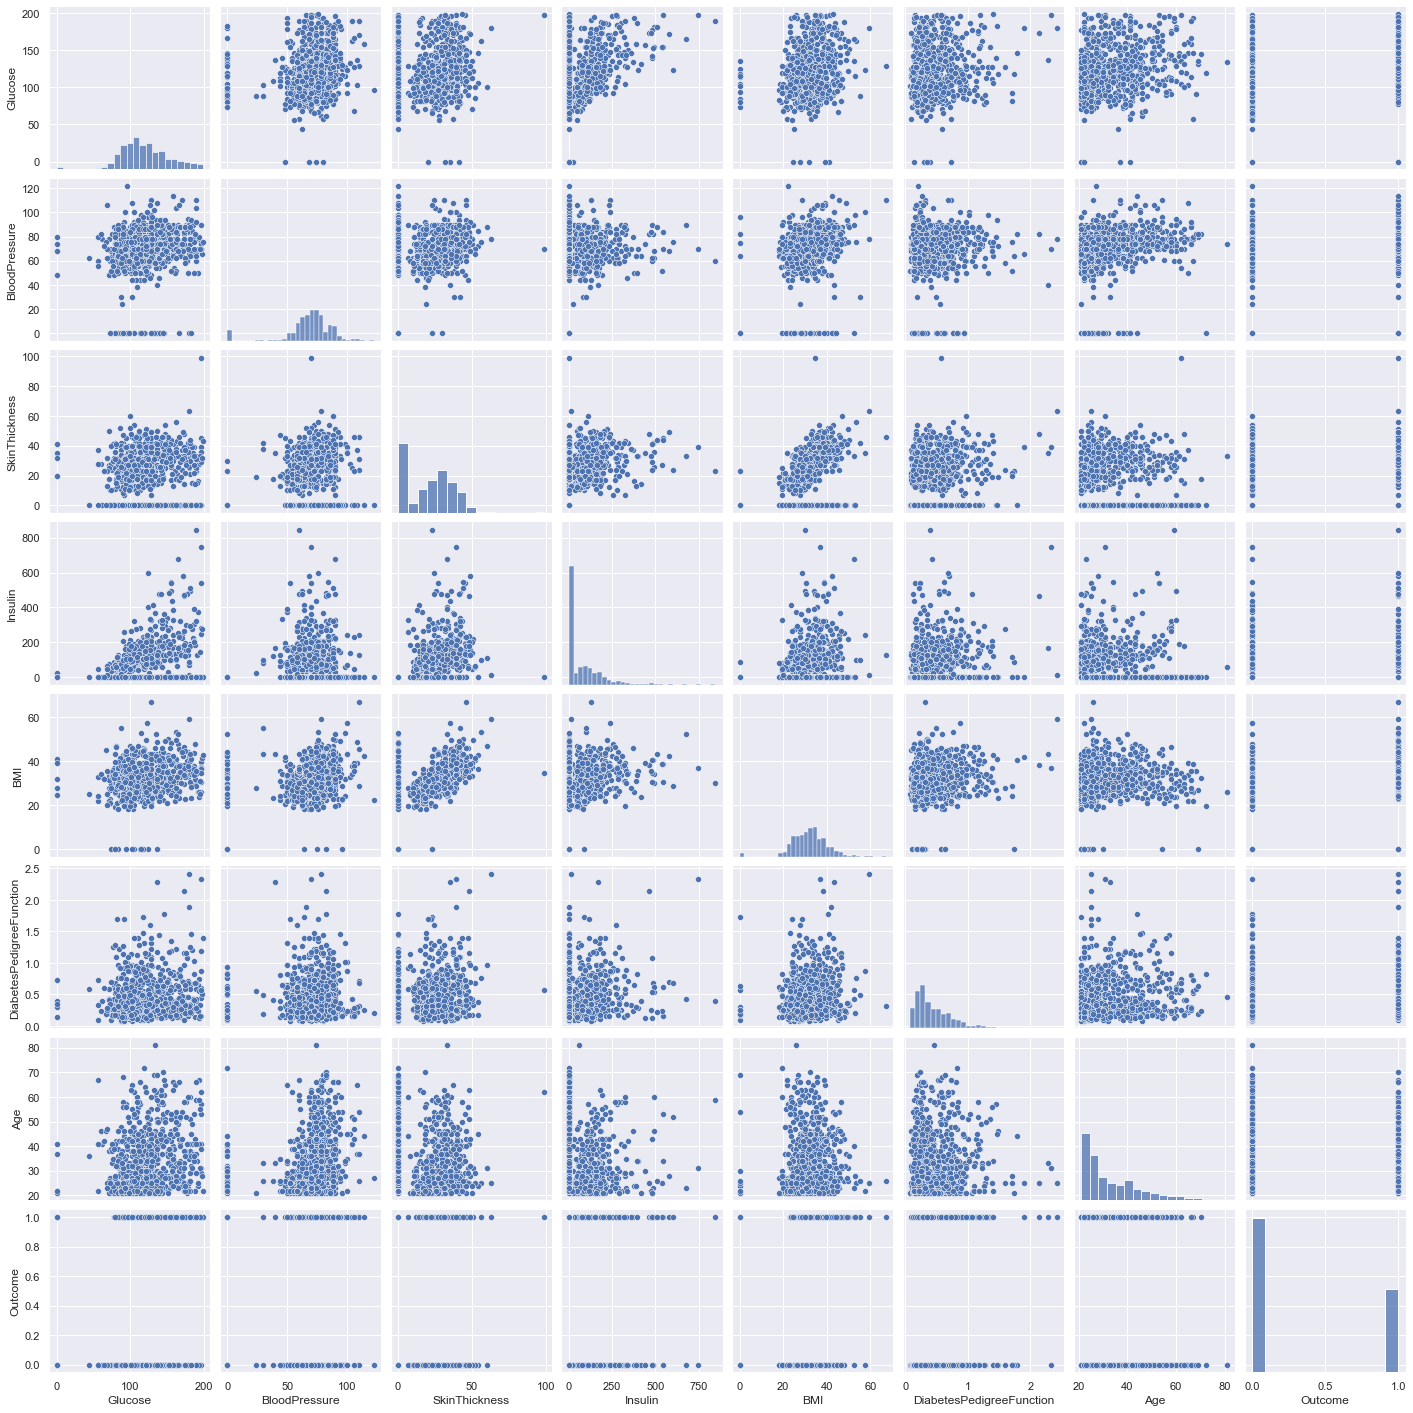

In [35]:
sns.pairplot(df)

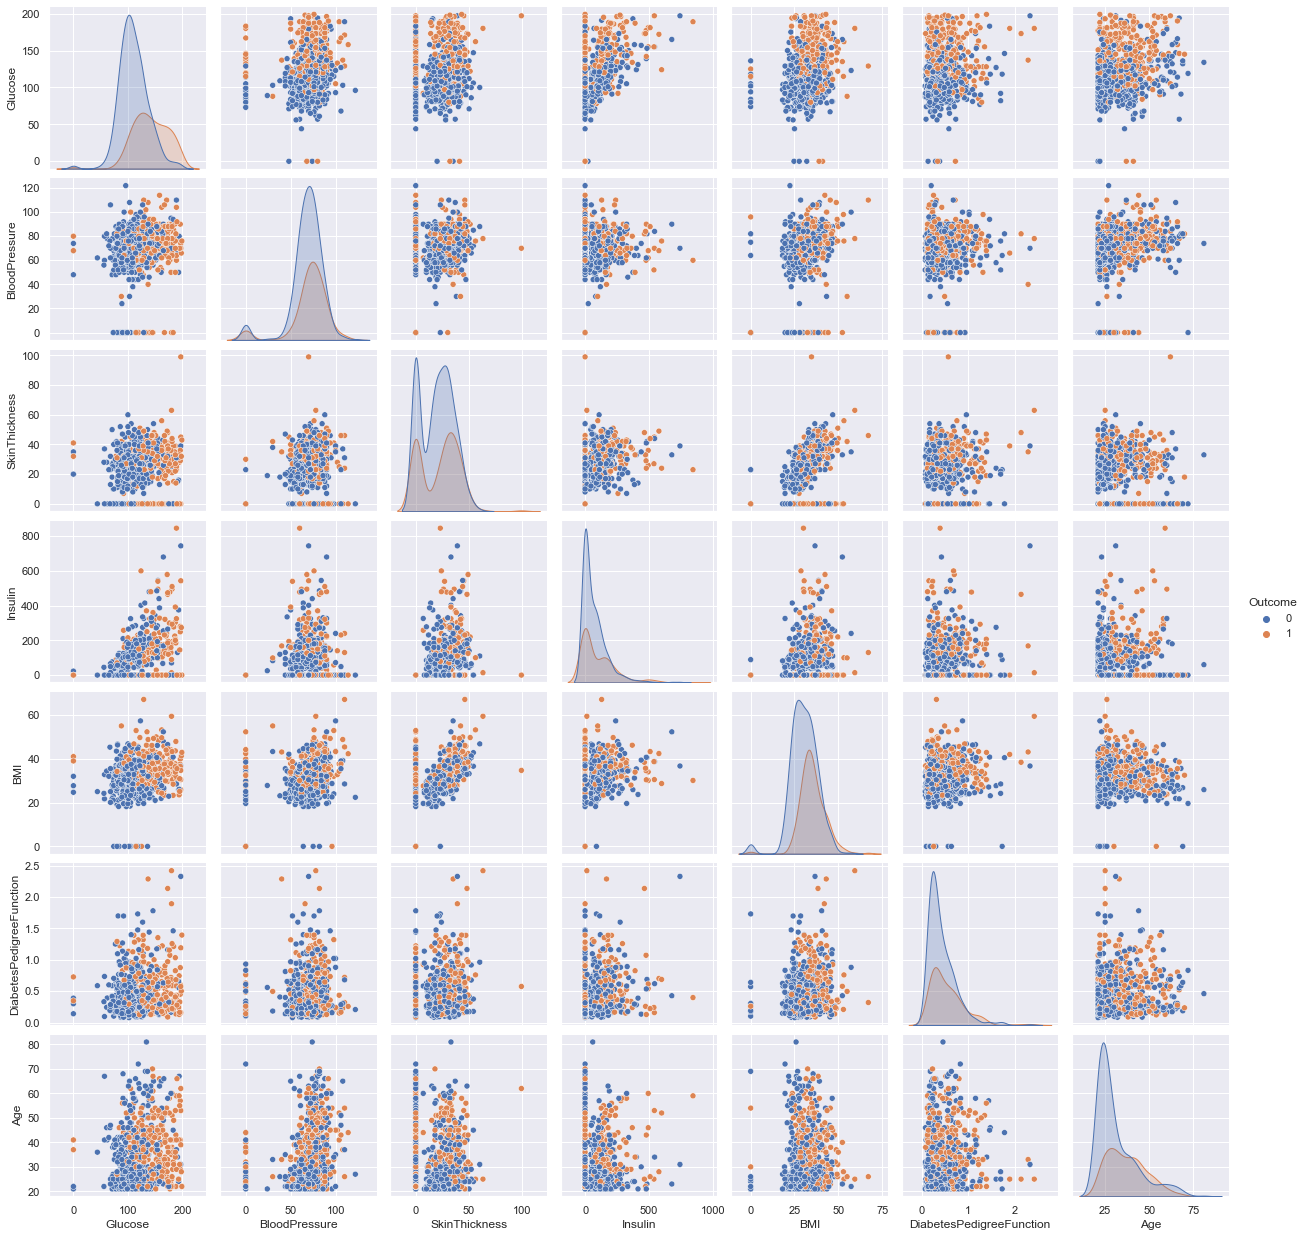

In [36]:
sns.pairplot(data =df, hue = 'Outcome')
plt.show()

<Figure size 1152x864 with 0 Axes>

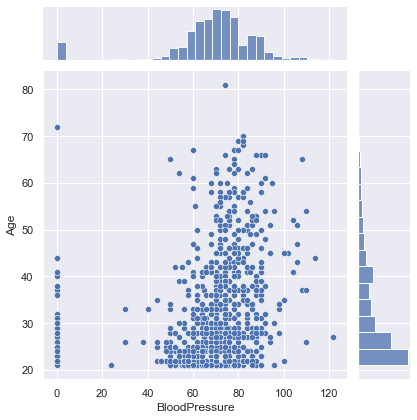

In [37]:
plt.figure(figsize=(16,12))
sns.jointplot(x='BloodPressure',y='Age',data=df)

C:\Users\Harshini\anaconda3\envs\Harsh\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='BloodPressure', ylabel='Age'>

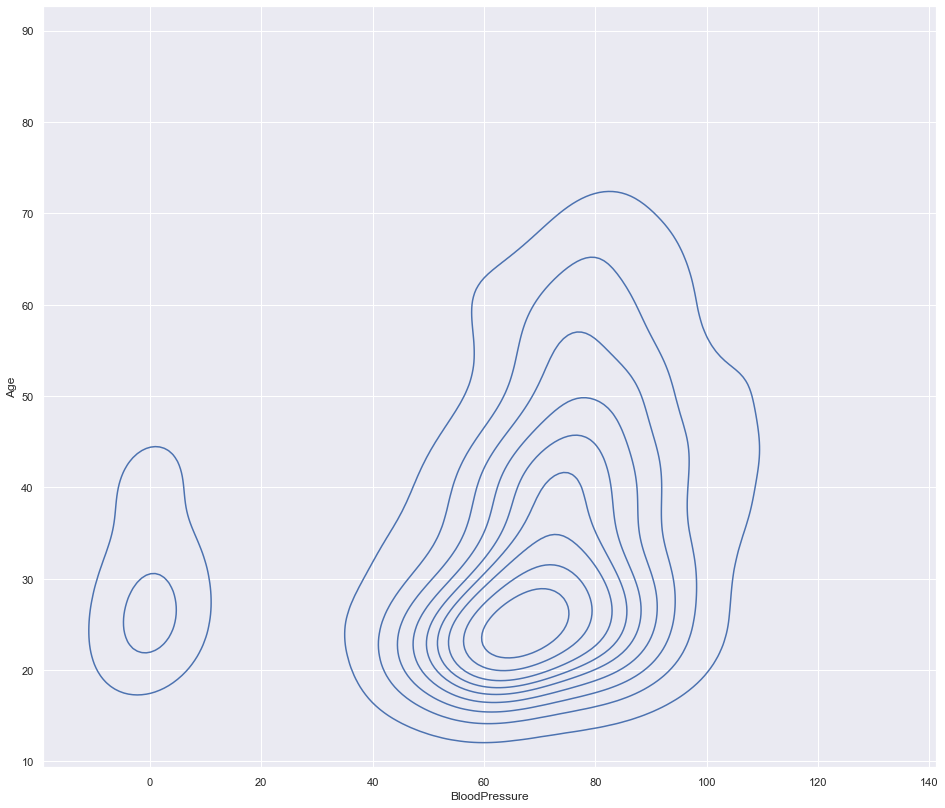

In [38]:
plt.figure(figsize=(16,14))
sns.kdeplot(df.BloodPressure, df.Age)

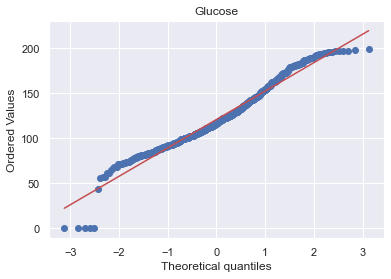

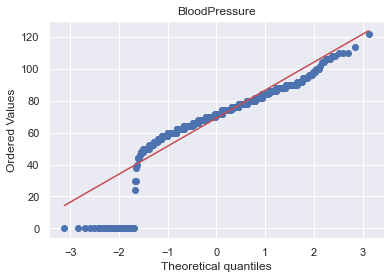

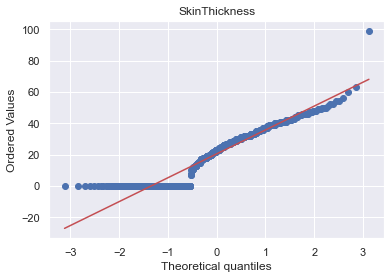

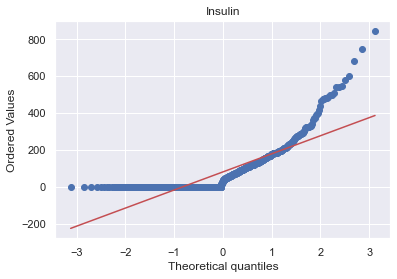

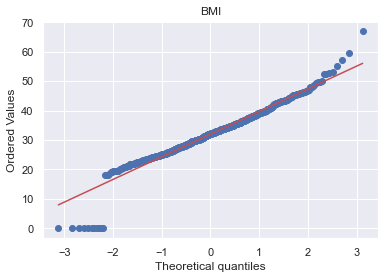

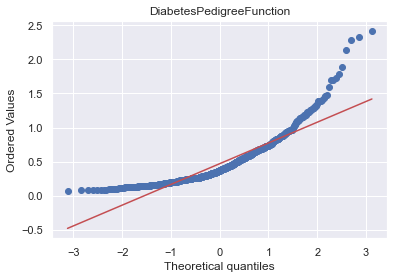

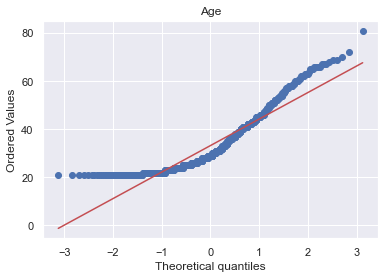

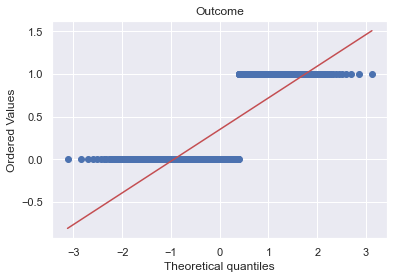

In [39]:
from scipy import stats
for feature in df.columns:
    stats.probplot(df[feature], plot = plt)
    plt.title(feature)
    plt.show()

In [40]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

In [41]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [42]:
X.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,,,,,,,
6,148,72,35,0,33.6,0.627,50
1,85,66,29,0,26.6,0.351,31
8,183,64,0,0,23.3,0.672,32
1,89,66,23,94,28.1,0.167,21
0,137,40,35,168,43.1,2.288,33


In [43]:
y.head()

Pregnancies
6    1
1    0
8    1
1    0
0    1
Name: Outcome, dtype: int64

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [45]:
def svm_classifier(X_train, X_test, y_train, y_test):
    
    classifier_svm = SVC(kernel = 'rbf', random_state = 0)
    classifier_svm.fit(X_train, y_train)

    y_pred = classifier_svm.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)

    return print(f"Train score : {classifier_svm.score(X_train, y_train)}\nTest score : {classifier_svm.score(X_test, y_test)}")

In [46]:
def knn_classifier(X_train, X_test, y_train, y_test):
    
    classifier_knn = KNeighborsClassifier(metric = 'minkowski', p = 2)
    classifier_knn.fit(X_train, y_train)

    y_pred = classifier_knn.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)

    return print(f"Train score : {classifier_knn.score(X_train, y_train)}\nTest score : {classifier_knn.score(X_test, y_test)}")

In [47]:
def tree_classifier(X_train, X_test, y_train, y_test):
    
    classifier_tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
    classifier_tree.fit(X_train, y_train)

    y_pred = classifier_tree.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)

    return print(f"Train score : {classifier_tree.score(X_train, y_train)}\nTest score : {classifier_tree.score(X_test, y_test)}")

In [48]:
def forest_classifier(X_train, X_test, y_train, y_test):
    classifier_forest = RandomForestClassifier(criterion = 'entropy', random_state = 0)
    classifier_forest.fit(X_train, y_train)

    y_pred = classifier_forest.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)

    return print(f"Train score : {classifier_forest.score(X_train, y_train)}\nTest score : {classifier_forest.score(X_test, y_test)}")

In [49]:
def print_score(X_train, X_test, y_train, y_test):
    print("SVM:\n")
    svm_classifier(X_train, X_test, y_train, y_test)

    print("-"*100)
    print()

    print("KNN:\n")
    knn_classifier(X_train, X_test, y_train, y_test)

    print("-"*100)
    print()

    

    print("Decision Tree:\n")
    tree_classifier(X_train, X_test, y_train, y_test)

    print("-"*100)
    print()

    print("Random Forest:\n")
    forest_classifier(X_train, X_test, y_train, y_test)


In [50]:
print_score(X_train, X_test, y_train, y_test)

SVM:

Train score : 0.760586319218241
Test score : 0.7922077922077922
----------------------------------------------------------------------------------------------------

KNN:

Train score : 0.7899022801302932
Test score : 0.7402597402597403
----------------------------------------------------------------------------------------------------

Decision Tree:

Train score : 1.0
Test score : 0.7337662337662337
----------------------------------------------------------------------------------------------------

Random Forest:

Train score : 1.0
Test score : 0.7857142857142857


In [51]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression(C=20.0)
knn=KNeighborsClassifier(n_neighbors=3)
svm=SVC(kernel='linear')
dt=DecisionTreeClassifier()
rf=RandomForestClassifier(n_estimators=100)

In [52]:
log.fit(X_train,y_train)
knn.fit(X_train,y_train)
svm.fit(X_train,y_train)
dt.fit(X_train,y_train)
rf.fit(X_train,y_train)

C:\Users\Harshini\anaconda3\envs\Harsh\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


RandomForestClassifier()

In [53]:
y_log=log.predict(X_test)
y_knn=knn.predict(X_test)
y_svm=svm.predict(X_test)
y_dt=dt.predict(X_test)
y_rf=rf.predict(X_test)

In [54]:
log_cm_test=confusion_matrix(y_test,y_log)
knn_cm_test=confusion_matrix(y_test,y_knn)
svm_cm_test=confusion_matrix(y_test,y_svm)
dt_cm_test=confusion_matrix(y_test,y_dt)
rf_cm_test=confusion_matrix(y_test,y_rf)

In [55]:
from sklearn.metrics import accuracy_score
log_acc_test=accuracy_score(y_test,y_log)
knn_acc_test=accuracy_score(y_test,y_knn)
svm_acc_test=accuracy_score(y_test,y_svm)
dt_acc_test=accuracy_score(y_test,y_dt)
rf_acc_test=accuracy_score(y_test,y_rf)
from sklearn.metrics import accuracy_score
log_acc_test=accuracy_score(y_test,y_log)
knn_acc_test=accuracy_score(y_test,y_knn)
svm_acc_test=accuracy_score(y_test,y_svm)
dt_acc_test=accuracy_score(y_test,y_dt)
rf_acc_test=accuracy_score(y_test,y_rf)

In [56]:
print('Accuracy Scores\n')

print('\n'+'#'*20+'Logistic Regression'+'#'*20)
print(log_acc_test)

print('\n'+'#'*20+'KNearest Neighbour'+'#'*20)
print(knn_acc_test)

print('\n'+'#'*20+'SVM'+'#'*20)
print(svm_acc_test)

print('\n'+'#'*20+'Decision Tree Classifier'+'#'*20)
print(dt_acc_test)

print('\n'+'#'*20+'Random Forest Classifier'+'#'*20)
print(rf_acc_test)

Accuracy Scores


####################Logistic Regression####################
0.8051948051948052

####################KNearest Neighbour####################
0.7207792207792207

####################SVM####################
0.8116883116883117

####################Decision Tree Classifier####################
0.7142857142857143

####################Random Forest Classifier####################
0.7987012987012987


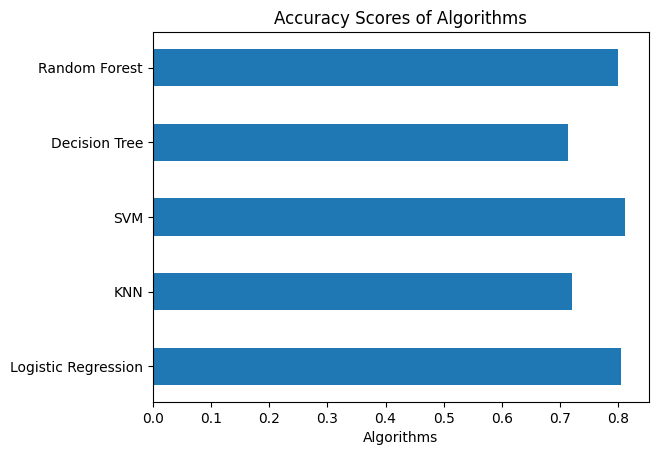

In [57]:
acc_list=[log_acc_test,knn_acc_test,svm_acc_test,dt_acc_test,rf_acc_test]
import matplotlib.pyplot as plt; plt.rcdefaults()
 
objects = ('Logistic Regression', 'KNN', 'SVM', 'Decision Tree', 'Random Forest')
y_pos = np.arange(len(objects))
performance = acc_list
width = 1/2
plt.barh(y_pos, performance, width,align='center', alpha=1)
plt.yticks(y_pos,objects)
plt.xlabel('Accuracy')
plt.xlabel('Algorithms')
plt.title('Accuracy Scores of Algorithms')
plt.show()

In [58]:
#Performance
classifier_forest = RandomForestClassifier(criterion = 'entropy')
classifier_forest.fit(X_train, y_train)
y_pred = classifier_forest.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[92, 15],
       [14, 33]], dtype=int64)

In [59]:
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,92,15,107
1,14,33,47
All,106,48,154


In [60]:
df['Outcome'].value_counts() #balanced or not

0    500
1    268
Name: Outcome, dtype: int64

In [61]:
from sklearn.metrics import roc_auc_score, roc_curve, classification_report

In [62]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.86      0.86       107
           1       0.69      0.70      0.69        47

    accuracy                           0.81       154
   macro avg       0.78      0.78      0.78       154
weighted avg       0.81      0.81      0.81       154



In [63]:
y_pred_prob = classifier_forest.predict_proba(X_test)[:,1]
y_pred_prob

array([0.87, 0.14, 0.07, 0.62, 0.12, 0.03, 0.83, 0.87, 0.43, 0.4 , 0.7 ,
       0.87, 0.06, 0.21, 0.2 , 0.66, 0.84, 0.03, 0.38, 0.22, 0.54, 0.2 ,
       0.19, 0.23, 0.02, 0.34, 0.03, 0.83, 0.08, 0.2 , 0.38, 0.22, 0.22,
       0.64, 0.11, 0.74, 0.6 , 0.02, 0.36, 0.8 , 0.33, 0.13, 0.29, 0.82,
       0.71, 0.  , 0.06, 0.13, 0.49, 0.33, 0.44, 0.13, 0.68, 0.6 , 0.25,
       0.01, 0.28, 0.42, 0.36, 0.1 , 0.7 , 0.65, 0.02, 0.77, 0.87, 0.53,
       0.58, 0.12, 0.73, 0.16, 0.15, 0.2 , 0.08, 0.85, 0.91, 0.4 , 0.21,
       0.73, 0.14, 0.13, 0.36, 0.51, 0.31, 0.  , 0.15, 0.24, 0.08, 0.37,
       0.93, 0.09, 0.37, 0.32, 0.23, 0.  , 0.86, 0.11, 0.29, 0.37, 0.36,
       0.63, 0.22, 0.  , 0.19, 0.02, 0.72, 0.55, 0.13, 0.49, 0.04, 0.56,
       0.07, 0.42, 0.59, 0.83, 0.65, 0.63, 0.11, 0.48, 0.27, 0.62, 0.34,
       0.46, 0.13, 0.26, 0.02, 0.  , 0.36, 0.52, 0.31, 0.51, 0.53, 0.05,
       0.05, 0.64, 0.39, 0.63, 0.45, 0.49, 0.54, 0.26, 0.04, 0.78, 0.  ,
       0.08, 0.7 , 0.  , 0.11, 0.16, 0.11, 0.43, 0.

In [64]:
roc_auc_score(y_test,y_pred_prob)

0.845595545834162